<a href="https://colab.research.google.com/github/raswini2024/Retail-Inventory-Management/blob/main/retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📦 Row 1 analysis:
🧮 Missing items in Row 1: 0 / 5

📦 Row 2 analysis:
🧮 Missing items in Row 2: 0 / 5

📦 Row 3 analysis:
🧮 Missing items in Row 3: 0 / 5


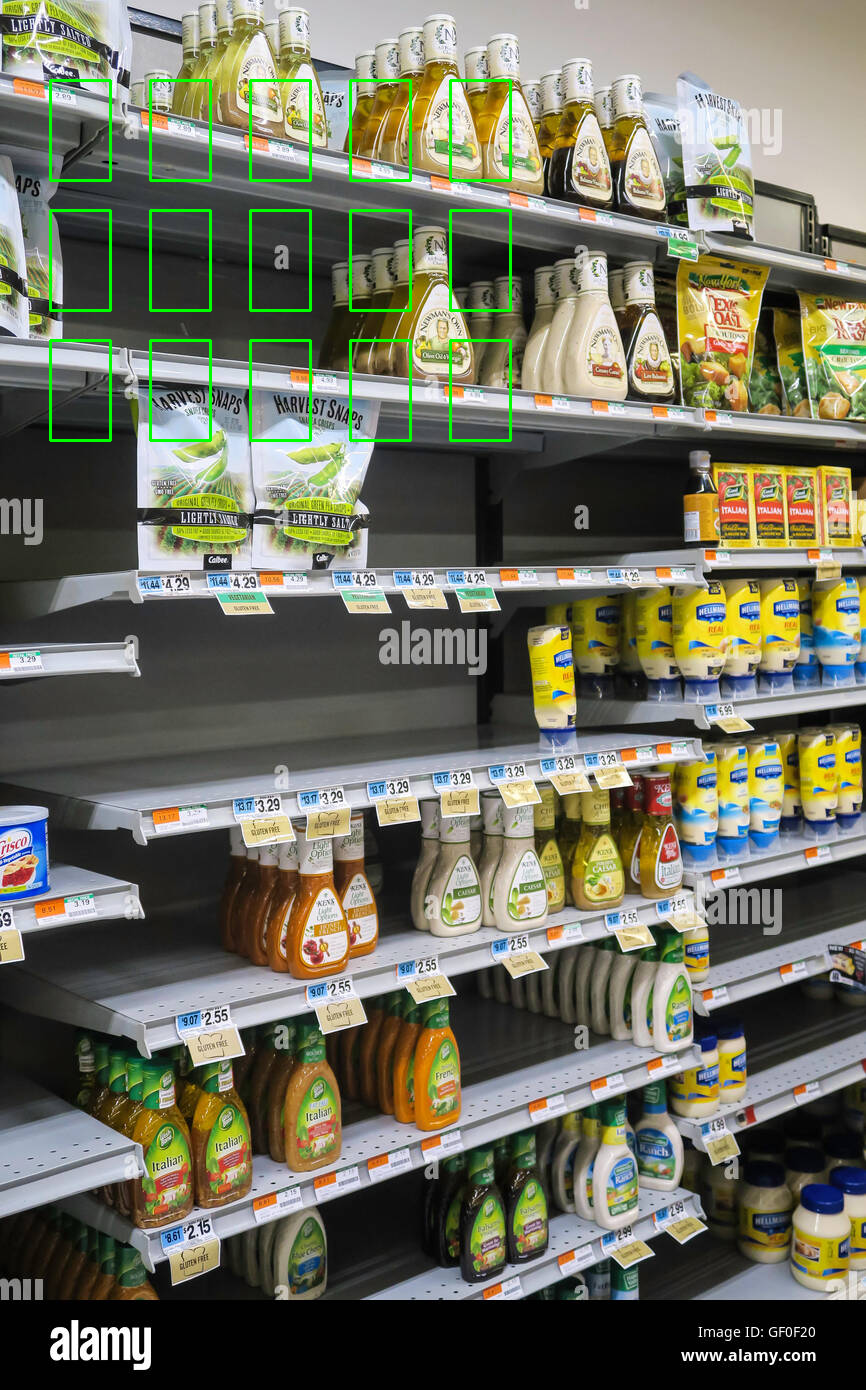

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# --- Configuration ---
IMAGE_PATH = 'shop1.jpg'  # Make sure this image is uploaded
MIN_OBJECT_AREA = 500        # Minimum contour area to count as a product

# Shelf layout configuration
NUM_ROWS = 3
NUM_COLS = 5
CELL_WIDTH = 60
CELL_HEIGHT = 100
START_X = 50
START_Y = 80
ROW_SPACING = 130   # vertical distance between rows
COL_SPACING = 100   # horizontal distance between columns

# --- Helper Function with bounds checking ---
def is_position_occupied(image, x, y, w, h):
    h_img, w_img = image.shape[:2]

    # Check if ROI is within image bounds
    if x < 0 or y < 0 or x + w > w_img or y + h > h_img:
        return False  # Treat as missing if out of bounds

    roi = image[y:y+h, x:x+w]
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if cv2.contourArea(cnt) > MIN_OBJECT_AREA:
            return True  # Product is present
    return False  # Empty slot

# --- Main Execution ---
if __name__ == "__main__":
    image = cv2.imread(IMAGE_PATH)
    if image is None:
        print(f"❌ Error: Could not open or find the image at {IMAGE_PATH}")
        exit()

    annotated = image.copy()

    for row in range(NUM_ROWS):
        missing_count = 0
        y = START_Y + row * ROW_SPACING
        print(f"\n📦 Row {row + 1} analysis:")

        for col in range(NUM_COLS):
            x = START_X + col * COL_SPACING
            if not is_position_occupied(image, x, y, CELL_WIDTH, CELL_HEIGHT):
                # Draw red box for missing
                missing_count += 1
                cv2.rectangle(annotated, (x, y), (x + CELL_WIDTH, y + CELL_HEIGHT), (0, 0, 255), 2)
                cv2.putText(annotated, "Missing", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            else:
                # Draw green box for detected item
                cv2.rectangle(annotated, (x, y), (x + CELL_WIDTH, y + CELL_HEIGHT), (0, 255, 0), 2)

        print(f"🧮 Missing items in Row {row + 1}: {missing_count} / {NUM_COLS}")

    # Display the annotated result
    cv2_imshow(annotated)
